In [1]:
import os
import gym


In [2]:
import matplotlib.pyplot as plt

In [3]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [4]:
environment_name = 'CartPole-v1'
env = gym.make(environment_name, render_mode="rgb_array")

Episode:1 Score:23.0


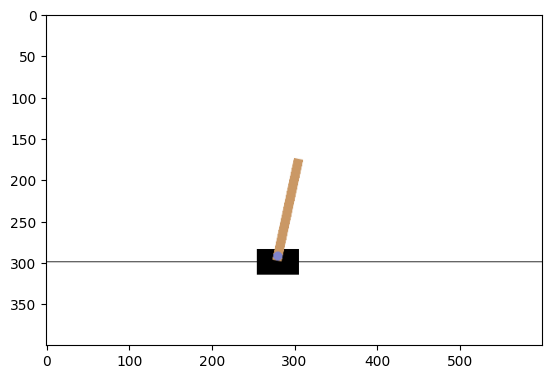

In [5]:
episodes = 1
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        #env.render()
        plt.imshow(env.render())
        # delay next frame
        # plt.pause(0.01)
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()



In [6]:
env.reset()

(array([ 0.00986755, -0.03296834, -0.01475957, -0.03886188], dtype=float32),
 {})

In [7]:
# type of action space
env.action_space

Discrete(2)

In [12]:
# sample action
env.action_space.sample()

1

In [13]:
# type of observation space, box means it's a continuous space
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [14]:
# Sample observation
env.observation_space.sample()

array([ 3.6013787e+00, -2.3965259e+38,  1.2081291e-01,  2.7877513e+38],
      dtype=float32)

In [15]:
n_state, reward, done, trucated, info = env.step(env.action_space.sample())

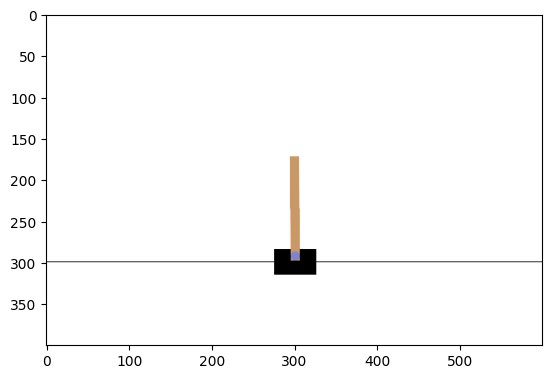

In [12]:
frame = env.render()
# plot the image
plt.imshow(frame)

## Training the RL model


In [16]:
log_path = os.path.join('training', 'logs')
print(log_path)

training\logs


In [17]:
# lets recreate the envionment
env = gym.make(environment_name)

In [18]:
# wrap the environment, so it's compatible with the stable baselines code
# vectorized environments allow to easily multiprocess training
env = DummyVecEnv([lambda: env]) # solve this warning later


c:\Users\Tinho\anaconda3\envs\gpu-env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [19]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)
# MLpPolicy is a multi-layer perceptron policy


Using cuda device


In [20]:
# help on PPO
help(PPO)

Help on class PPO in module stable_baselines3.ppo.ppo:

class PPO(stable_baselines3.common.on_policy_algorithm.OnPolicyAlgorithm)
 |  PPO(policy: Union[str, Type[stable_baselines3.common.policies.ActorCriticPolicy]], env: Union[gymnasium.core.Env, stable_baselines3.common.vec_env.base_vec_env.VecEnv, str], learning_rate: Union[float, Callable[[float], float]] = 0.0003, n_steps: int = 2048, batch_size: int = 64, n_epochs: int = 10, gamma: float = 0.99, gae_lambda: float = 0.95, clip_range: Union[float, Callable[[float], float]] = 0.2, clip_range_vf: Union[NoneType, float, Callable[[float], float]] = None, normalize_advantage: bool = True, ent_coef: float = 0.0, vf_coef: float = 0.5, max_grad_norm: float = 0.5, use_sde: bool = False, sde_sample_freq: int = -1, target_kl: Optional[float] = None, stats_window_size: int = 100, tensorboard_log: Optional[str] = None, policy_kwargs: Optional[Dict[str, Any]] = None, verbose: int = 0, seed: Optional[int] = None, device: Union[torch.device, str] 

In [21]:
# training
model.learn(total_timesteps=20000)

Logging to training\logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 54   |
|    iterations      | 1    |
|    time_elapsed    | 37   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 2           |
|    time_elapsed         | 47          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009469858 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00476     |
|    learning_rate        | 0.0003      |
|    loss                 | 6.76        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 56.2        |
-----------------------------------------
---

## Save and Reload

In [22]:
PPO_Path = os.path.join('training', 'saved-models', 'PPO_Model_CartPole')

In [23]:
model.save(PPO_Path)

In [ ]:
# delete model to demonstrate loading
del model
# load model    
model = PPO.load(PPO_Path, env=env)

## Evaluation

In [24]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

c:\Users\Tinho\anaconda3\envs\gpu-env\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
c:\Users\Tinho\anaconda3\envs\gpu-env\lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:234: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


(500.0, 0.0)

In [25]:
# close the environment
env.close()

## Test Model

In [27]:
episodes = 5
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action, _ = model.predict(obs) # here we use the model to predict the action
        obs, reward, done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))
# close the environment
# env.close()

Episode:1 Score:[500.]
Episode:2 Score:[246.]
Episode:3 Score:[500.]
Episode:4 Score:[500.]
Episode:5 Score:[500.]


## Viewing logs

In [ ]:
training_log_path = os.path.join(log_path, 'PPO_1')

In [28]:
!tensorboard --logdir={training_log_path}

^C
